**In this script, following parameters are changed as compared to the previous segnet20 script**


1. Modality changed to t2
2. Random state in test train split removed
3. Both tests and validation samples are 20 percent of the orignal data set
4. Reshape command removed at the output layer of model

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers import BatchNormalization
#from keras import layers
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#t2_list = sorted(glob.glob('/content/drive/MyDrive/TrainingData/*/*t2.nii'))
flair_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*flair.nii'))
#flair_list = sorted(glob.glob('/content/drive/MyDrive/TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/DataSetBrats/Data/*/*seg.nii'))
combined_images = []
combined_masks = []
#Each volume generates 18 64x64x64x4 sub-volumes. 
#Total 369 volumes = 6642 sub volumes
print('No of images and masks are : ',len(flair_list))
for img in range(len(flair_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    #temp_image_t2=nib.load(t2_list[img]).get_fdata()
    #temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    temp_image_flair=temp_image_flair[56:184, 56:184, 13:141]
    combined_images.append(temp_image_flair)

    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    combined_masks.append(temp_mask)

    #np.save('/content/drive/MyDrive/input_data_3_channels/images/image_'+str(img)+'.npy', temp_combined_images)
    #np.save('/content/drive/MyDrive/input_data_3_channels/masks/mask_'+str(img)+'.npy', temp_mask)
    
   

In [ ]:
combined_images = np.array(combined_images)
combined_masks = np.array(combined_masks)

In [ ]:
combined_images.shape, combined_masks.shape

((210, 128, 128, 128), (210, 128, 128, 128))

In [ ]:
import random

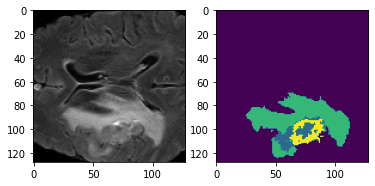

In [ ]:
n = random.randint(45,95)
x = random.randint(0,210)

plt.subplot(121)
plt.imshow(combined_images[x,:,:,n], cmap = 'gray')
plt.subplot(122)
plt.imshow(combined_masks[x,:,:,n])

In [ ]:
np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/image_flair_combined.npy',combined_images)
#np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/mask_combined.npy', combined_masks)

In [ ]:
image2D = []
for i in range(210):
  for j in range(128):
    image2D.append(combined_images[i,:,:,j])

x_train = np.array(image2D)

In [ ]:
mask2D = []
for i in range(210):
  for j in range(128):
    mask2D.append(combined_masks[i,:,:,j])

y_train = np.array(mask2D)

In [ ]:
image2D = 0
mask2D = 0

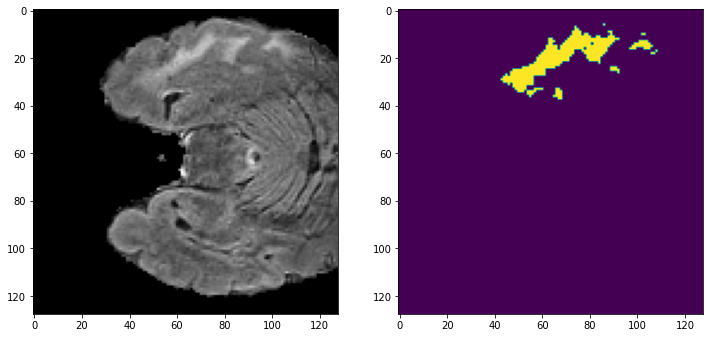

In [ ]:
#n = random.randint(45,95)
x = random.randint(0,10000)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(x_train[x,:,:], cmap = 'gray')
plt.subplot(122)
plt.imshow(y_train[x,:,:])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20)

In [ ]:
#shapes after Conversion to 2D
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21504, 128, 128), (5376, 128, 128), (21504, 128, 128), (5376, 128, 128))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((17203, 128, 128), (4301, 128, 128), (17203, 128, 128), (4301, 128, 128))

<function matplotlib.pyplot.imshow>

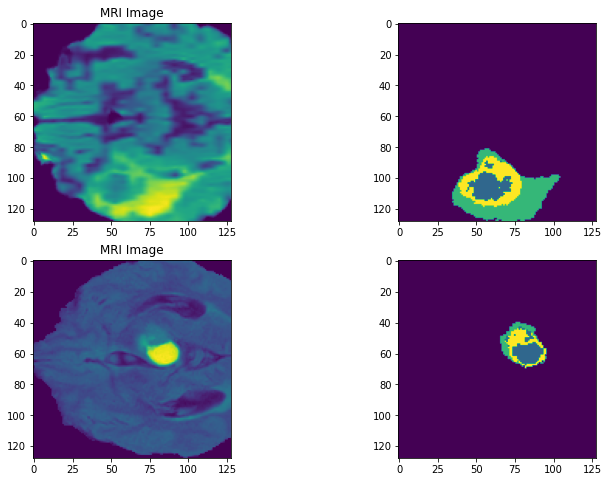

In [ ]:
rand=np.random.randint(0,17203 )
rand_2=np.random.randint(0,4301)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('MRI Image')
plt.imshow(x_train[rand,:,:])
plt.subplot(222)
plt.imshow(y_train[rand,:,:])

plt.subplot(223)
plt.title('MRI Image')
plt.imshow(x_train[rand_2,:,:])
plt.subplot(224)
plt.imshow(y_train[rand_2,:,:])

plt.imshow

In [ ]:
x_train = np.expand_dims(x_train, axis = 3)
x_val = np.expand_dims(x_val, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

In [ ]:
x_train.shape,x_val.shape,x_test.shape

((17203, 128, 128, 1), (4301, 128, 128, 1), (5376, 128, 128, 1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
#y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train.shape,y_val.shape,y_test.shape

((17203, 128, 128, 4), (4301, 128, 128, 4), (5376, 128, 128))

In [ ]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice_coef(y_true, y_pred, smooth = 100):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))


In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers import BatchNormalization

#from layers import MaxPoolingWithArgmax2D, MaxUnpooling2D

def segnet(
        input_shape,
        n_labels,
        kernel=3,
        pool_size=(2, 2),
        output_mode="softmax"):
    # encoder
    inputs = Input(shape=input_shape)
    #inputs = tf.convert_to_tensor(inputs)
    conv_1 = Convolution2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block1_conv1")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    conv_2 = Convolution2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block1_conv2")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)
    pool_1 = MaxPooling2D(pool_size, name="block1_pool")(conv_2)

    conv_3 = Convolution2D(128, (kernel, kernel), padding="same" , kernel_initializer='he_normal', name="block2_conv1")(pool_1)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    conv_4 = Convolution2D(128, (kernel, kernel), padding="same", kernel_initializer='he_normal',  name="block2_conv2")(conv_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)

    pool_2 = MaxPooling2D(pool_size, name="block2_pool")(conv_4)

    conv_5 = Convolution2D(256, (kernel, kernel), padding="same" , kernel_initializer='he_normal', name="block3_conv1")(pool_2)
    conv_5 = BatchNormalization()(conv_5)
    conv_5 = Activation("relu")(conv_5)
    conv_6 = Convolution2D(256, (kernel, kernel), padding="same" , kernel_initializer='he_normal', name="block3_conv2")(conv_5)
    conv_6 = BatchNormalization()(conv_6)
    conv_6 = Activation("relu")(conv_6)
    conv_7 = Convolution2D(256, (kernel, kernel), padding="same" , kernel_initializer='he_normal', name="block3_conv3")(conv_6)
    conv_7 = BatchNormalization()(conv_7)
    conv_7 = Activation("relu")(conv_7)

    pool_3 = MaxPooling2D(pool_size, name="block3_pool")(conv_7)

    conv_8 = Convolution2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block4_conv1")(pool_3)
    conv_8 = BatchNormalization()(conv_8)
    conv_8 = Activation("relu")(conv_8)
    conv_9 = Convolution2D(512, (kernel, kernel), padding="same" , kernel_initializer='he_normal', name="block4_conv2")(conv_8)
    conv_9 = BatchNormalization()(conv_9)
    conv_9 = Activation("relu")(conv_9)
    conv_10 = Convolution2D(512, (kernel, kernel), padding="same" , kernel_initializer='he_normal', name="block4_conv3")(conv_9)
    conv_10 = BatchNormalization()(conv_10)
    conv_10 = Activation("relu")(conv_10)

    pool_4 = MaxPooling2D(pool_size, name="block4_pool")(conv_10)

    conv_11 = Convolution2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal', name="block5_conv1")(pool_4)
    conv_11 = BatchNormalization()(conv_11)
    conv_11 = Activation("relu")(conv_11)
    conv_12 = Convolution2D(512, (kernel, kernel), padding="same" , kernel_initializer='he_normal',  name="block5_conv2")(conv_11)
    conv_12 = BatchNormalization()(conv_12)
    conv_12 = Activation("relu")(conv_12)
    conv_13 = Convolution2D(512, (kernel, kernel), padding="same" , kernel_initializer='he_normal',  name="block5_conv3")(conv_12)
    conv_13 = BatchNormalization()(conv_13)
    conv_13 = Activation("relu")(conv_13)

    pool_5 = MaxPooling2D(pool_size, name="block5_pool")(conv_13)
   
    # decoder
    unpool_1 = UpSampling2D(pool_size)(pool_5)

    conv_14 = Convolution2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_1)
    conv_14 = BatchNormalization()(conv_14)
    conv_14 = Activation("relu")(conv_14)
    conv_15 = Convolution2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_14)
    conv_15 = BatchNormalization()(conv_15)
    conv_15 = Activation("relu")(conv_15)
    conv_16 = Convolution2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_15)
    conv_16 = BatchNormalization()(conv_16)
    conv_16 = Activation("relu")(conv_16)

    unpool_2 = UpSampling2D(pool_size)(conv_16)

    conv_17 = Convolution2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_2)
    conv_17 = BatchNormalization()(conv_17)
    conv_17 = Activation("relu")(conv_17)
    conv_18 = Convolution2D(512, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_17)
    conv_18 = BatchNormalization()(conv_18)
    conv_18 = Activation("relu")(conv_18)
    conv_19 = Convolution2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_18)
    conv_19 = BatchNormalization()(conv_19)
    conv_19 = Activation("relu")(conv_19)

    unpool_3 = UpSampling2D(pool_size)(conv_19)

    conv_20 = Convolution2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_3)
    conv_20 = BatchNormalization()(conv_20)
    conv_20 = Activation("relu")(conv_20)
    conv_21 = Convolution2D(256, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_20)
    conv_21 = BatchNormalization()(conv_21)
    conv_21 = Activation("relu")(conv_21)
    conv_22 = Convolution2D(128, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_21)
    conv_22 = BatchNormalization()(conv_22)
    conv_22 = Activation("relu")(conv_22)

    unpool_4 = UpSampling2D(pool_size)(conv_22)

    conv_23 = Convolution2D(128, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_4)
    conv_23 = BatchNormalization()(conv_23)
    conv_23 = Activation("relu")(conv_23)
    conv_24 = Convolution2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal')(conv_23)
    conv_24 = BatchNormalization()(conv_24)
    conv_24 = Activation("relu")(conv_24)

    unpool_5 = UpSampling2D(pool_size)(conv_24)
    #pool, ind, output_shape, batch_size, name=None

    conv_25 = Convolution2D(64, (kernel, kernel), padding="same", kernel_initializer='he_normal')(unpool_5)
    conv_25 = BatchNormalization()(conv_25)
    conv_25 = Activation("relu")(conv_25)

    conv_26 = Convolution2D(n_labels, (1, 1), padding="same", kernel_initializer='he_normal')(conv_25)
    conv_26 = BatchNormalization()(conv_26)

    #conv_26 = Reshape((128,128,4))(conv_26)
    #conv_26 = Dense(4)(conv_26)
    outputs = Activation(output_mode)(conv_26)
    print("Build decoder done..")
    #pred = Reshape((128,128,128))(outputs)
    model = Model(inputs=inputs, outputs=outputs, name="SegNet")

    return model


model = segnet(input_shape=(128,128,1), n_labels=4)

model.summary()
print(model.input_shape)
print(model.output_shape)

Build decoder done..
Model: "SegNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 128

In [ ]:
model.compile(optimizer= Adam(learning_rate=0.0001), loss= ["categorical_crossentropy"]
                  , metrics=[iou, dice_coef, precision, recall, accuracy])


In [ ]:
hist = model.fit(x_train, y_train, epochs= 30, batch_size= 8, validation_data= (x_val, y_val), verbose=1)

Epoch 1/30
2151/2151 [==============================] - 176s 72ms/step - loss: 1.0509 - iou: 0.9947 - dice_coef: 0.3752 - precision: 0.4854 - recall: 0.0071 - accuracy: 0.7508 - val_loss: 1.7594 - val_iou: 0.9946 - val_dice_coef: 0.3929 - val_precision: 0.6430 - val_recall: 0.1113 - val_accuracy: 0.7642
Epoch 2/30
2151/2151 [==============================] - 153s 71ms/step - loss: 0.7735 - iou: 0.9964 - dice_coef: 0.4852 - precision: 0.8071 - recall: 0.4373 - accuracy: 0.8572 - val_loss: 0.6804 - val_iou: 0.9971 - val_dice_coef: 0.5419 - val_precision: 0.9899 - val_recall: 0.9237 - val_accuracy: 0.9786
Epoch 3/30
2151/2151 [==============================] - 153s 71ms/step - loss: 0.5783 - iou: 0.9976 - dice_coef: 0.5854 - precision: 0.9874 - recall: 0.9341 - accuracy: 0.9807 - val_loss: 0.4822 - val_iou: 0.9981 - val_dice_coef: 0.6316 - val_precision: 0.9875 - val_recall: 0.9630 - val_accuracy: 0.9877
Epoch 4/30
2151/2151 [==============================] - 152s 71ms/step - loss: 0.4282

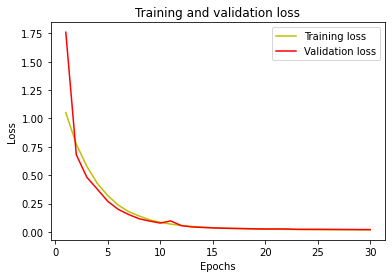

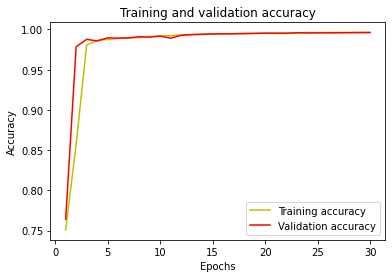

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/Models/Model20 improved/SegNet21_model.h5')

In [ ]:
prediction = model.predict(x_test)

In [ ]:
pred=np.argmax(prediction, axis=3)

In [ ]:
pred.shape

(5376, 128, 128)

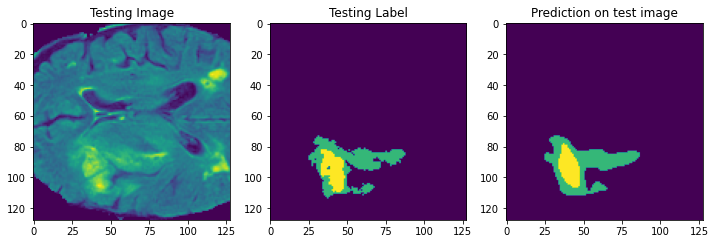

In [ ]:
#n=random.randint(45,95)


image = random.randint(0,5376)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(x_test[image,:,:,0])
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(y_test[image,:,:])
plt.subplot(133)
plt.title('Prediction on test image')
plt.imshow(pred[image,:,:])
plt.show()

In [ ]:
acc = accuracy(y_test, pred)
print(acc)

tf.Tensor(0.9911072, shape=(), dtype=float32)


In [ ]:
y_tst = tf.keras.utils.to_categorical(y_test)

In [ ]:

print('\n-------------On Training Set--------------------------\n')
res = model.evaluate(x_train, y_train, batch_size= 10)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')

print('\n-------------On validation Set---------------------\n')
res = model.evaluate(x_val, y_val, batch_size= 10)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')

print('\n-------------On Test Set---------------------\n')
res = model.evaluate(x_test, y_tst, batch_size= 10)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')


-------------On Training Set--------------------------

1721/1721 [==============================] - 48s 28ms/step - loss: 0.0167 - iou: 0.9999 - dice_coef: 0.9899 - precision: 0.9938 - recall: 0.9928 - accuracy: 0.9967
________________________
IOU:       |   99.99  |
Dice Coef: |   98.99  |
Precision: |   99.38  |
Recall:    |   99.28  |
Accuracy:  |   99.67  |
Loss:      |   1.67  |
________________________

-------------On validation Set---------------------

